In [4]:
import sys, os
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image

def read_pfm(filename):
    file = open(filename, 'rb')
    color = None
    width = None
    height = None
    scale = None
    endian = None

    header = file.readline().decode('utf-8').rstrip()
    if header == 'PF':
        color = True
    elif header == 'Pf':
        color = False
    else:
        raise Exception('Not a PFM file.')

    dim_match = re.match(r'^(\d+)\s(\d+)\s$', file.readline().decode('utf-8'))
    if dim_match:
        width, height = map(int, dim_match.groups())
    else:
        raise Exception('Malformed PFM header.')

    scale = float(file.readline().rstrip())
    if scale < 0:  # little-endian
        endian = '<'
        scale = -scale
    else:
        endian = '>'  # big-endian

    data = np.fromfile(file, endian + 'f')
    shape = (height, width, 3) if color else (height, width)

    data = np.reshape(data, shape)
    data = np.flipud(data)
    file.close()
    return data, scale

def read_depth(filename):
    depth = read_pfm(filename)[0]

    return np.array(depth, dtype=np.float32)

def read_mask(filename):
    mask = np.array(Image.open(filename), dtype=np.float32)

    return mask

In [5]:
thisname = 'vis_dual_06_7test(0.3285)'
depthname = "00000009.pfm"

scan1 00000009.pfm


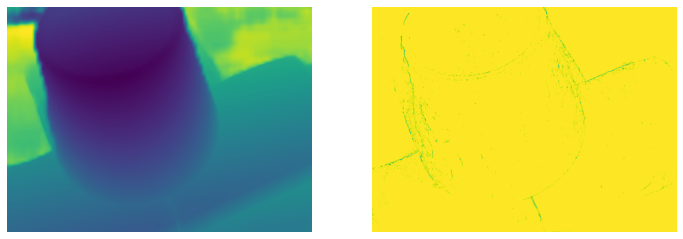

In [6]:
files = os.listdir(os.path.join(thisname))
files = list(filter(lambda x: x.startswith("scan"), files))
files.sort(key=lambda x: int(x[4:]))
for filename in files:
    print(filename, depthname)

    depth_filename = os.path.join(thisname, filename, "depth_est", depthname)
    depth = read_depth(depth_filename)

    confidence_filename = os.path.join(thisname, filename, "confidence", depthname)
    confidence = read_depth(confidence_filename)


    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.xticks([]), plt.yticks([]), plt.axis('off')
    plt.imshow(depth, 'viridis')

    plt.subplot(1,2,2)
    plt.xticks([]), plt.yticks([]), plt.axis('off')
    plt.imshow(confidence, 'viridis')
    plt.show()

    break